In [1]:
%load_ext autoreload
%autoreload 2

# Testing examples from hydrology

In [2]:
%aimport easysnowdata
import geopandas as gpd
from easysnowdata.utils import convert_bbox_to_geodataframe
import json
import ee
import matplotlib.pyplot as plt
import contextily as ctx


In [3]:
bbox_gdf = gpd.read_file(
    "https://github.com/egagli/easysnowdata/raw/main/docs/examples/mt_rainier.geojson"
)

## Get all HUC02 geometries

This might take a moment...

In [4]:
huc02_gdf = easysnowdata.hydrology.get_huc_geometries(huc_level='02')

Retrieving HUC02 geometries for the region of interest...


In [8]:
#huc02_gdf.explore()

## Get HUC geometries given a bounding box

In [6]:
huc02_gdf = easysnowdata.hydrology.get_huc_geometries(bbox_input=bbox_gdf,huc_level='02')
huc04_gdf = easysnowdata.hydrology.get_huc_geometries(bbox_input=bbox_gdf,huc_level='04')
huc06_gdf = easysnowdata.hydrology.get_huc_geometries(bbox_input=bbox_gdf,huc_level='06')
huc08_gdf = easysnowdata.hydrology.get_huc_geometries(bbox_input=bbox_gdf,huc_level='08')
huc10_gdf = easysnowdata.hydrology.get_huc_geometries(bbox_input=bbox_gdf,huc_level='10')
huc12_gdf = easysnowdata.hydrology.get_huc_geometries(bbox_input=bbox_gdf,huc_level='12')

Retrieving HUC02 geometries for the region of interest...
Retrieving HUC04 geometries for the region of interest...
Retrieving HUC06 geometries for the region of interest...
Retrieving HUC08 geometries for the region of interest...
Retrieving HUC10 geometries for the region of interest...
Retrieving HUC12 geometries for the region of interest...


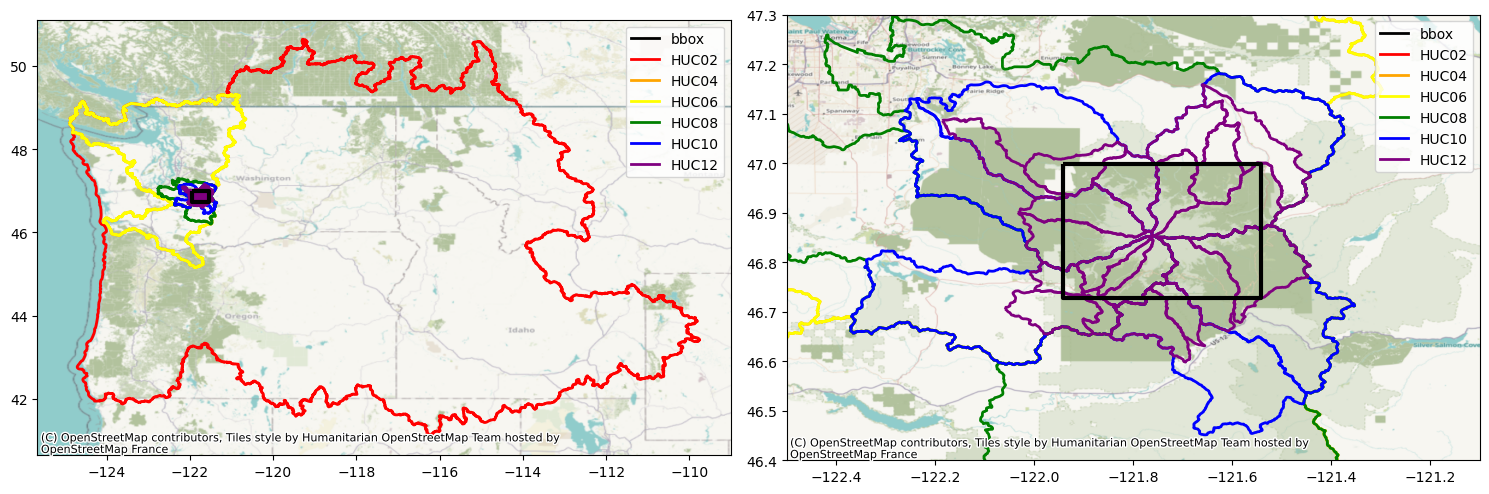

In [7]:
f, axs = plt.subplots(1,2,figsize=(15,7))

for ax in axs:
    huc02_gdf.plot(ax=ax, color="none", edgecolor="red", linewidth=2,label='HUC02')
    huc04_gdf.plot(ax=ax, color="none", edgecolor="orange", linewidth=2,label='HUC04')
    huc06_gdf.plot(ax=ax, color="none", edgecolor="yellow", linewidth=2,label='HUC06')
    huc08_gdf.plot(ax=ax, color="none", edgecolor="green", linewidth=2,label='HUC08')
    huc10_gdf.plot(ax=ax, color="none", edgecolor="blue", linewidth=2,label='HUC10')
    huc12_gdf.plot(ax=ax, color="none", edgecolor="purple", linewidth=2,label='HUC12')
    bbox_gdf.plot(ax=ax, color="none", edgecolor="black", linewidth=3,label='bbox')

ctx.add_basemap(axs[0], crs=huc02_gdf.crs)

axs[1].set_xlim(-122.5, -121.1)
axs[1].set_ylim(46.4, 47.3)
ctx.add_basemap(axs[1], crs=huc02_gdf.crs)


# Create a legend for the HUC levels
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color="black", lw=2, label='bbox'),
    Line2D([0], [0], color="red", lw=2, label='HUC02'),
    Line2D([0], [0], color="orange", lw=2, label='HUC04'),
    Line2D([0], [0], color="yellow", lw=2, label='HUC06'),
    Line2D([0], [0], color="green", lw=2, label='HUC08'),
    Line2D([0], [0], color="blue", lw=2, label='HUC10'),
    Line2D([0], [0], color="purple", lw=2, label='HUC12')
]
for ax in axs:
    ax.legend(handles=legend_elements)

f.tight_layout()